In [1]:
!pip install numpy pandas scipy matplotlib -q
!pip install matplotlib seaborn -q
!pip install yfinance -q
!pip install tensorflow -q



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf

2024-05-10 10:16:09.015869: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-10 10:16:09.016266: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 10:16:09.019504: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 10:16:09.068467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 10:16:10.128102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
facebookInfo = yf.Ticker("META")

In [4]:
facebookInfo.info

{'address1': '1 Meta Way',
 'city': 'Menlo Park',
 'state': 'CA',
 'zip': '94025',
 'country': 'United States',
 'phone': '650 543 4800',
 'website': 'https://investor.fb.com',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and wearables worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment offers Facebook, which enables people to share, discuss, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; M

In [5]:
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df = facebookInfo.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.005431,44.952305,37.959724,38.189480,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.491281,36.621144,32.965024,33.993931,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.575438,33.554399,30.907208,30.967144,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.336752,32.465554,31.326762,31.966084,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.915078,33.174801,31.736328,32.994991,50237200,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-03 00:00:00-04:00,445.929993,454.170013,443.850006,451.959991,16489100,0.0,0.0
2024-05-06 00:00:00-04:00,455.579987,466.160004,453.339996,465.679993,15094600,0.0,0.0
2024-05-07 00:00:00-04:00,466.290009,471.529999,461.309998,468.239990,13406800,0.0,0.0
2024-05-08 00:00:00-04:00,463.500000,475.579987,463.000000,472.600006,11683900,0.0,0.0
2024-05-09 00:00:00-04:00,470.000000,476.079987,467.630005,475.420013,9421500,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3013 entries, 2012-05-18 00:00:00-04:00 to 2024-05-09 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3013 non-null   float64
 1   High          3013 non-null   float64
 2   Low           3013 non-null   float64
 3   Close         3013 non-null   float64
 4   Volume        3013 non-null   int64  
 5   Dividends     3013 non-null   float64
 6   Stock Splits  3013 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 188.3 KB


<Axes: xlabel='Date'>

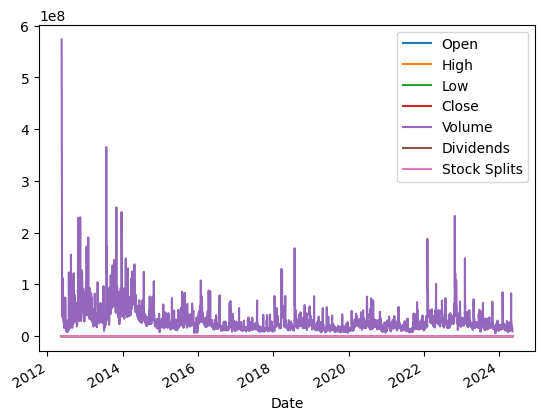

In [8]:
df.plot()

<Axes: xlabel='Date'>

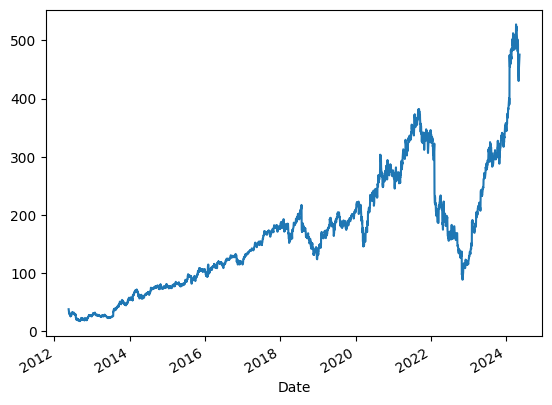

In [9]:
dfw = df.Close
dfw.plot()

<Axes: xlabel='Date'>

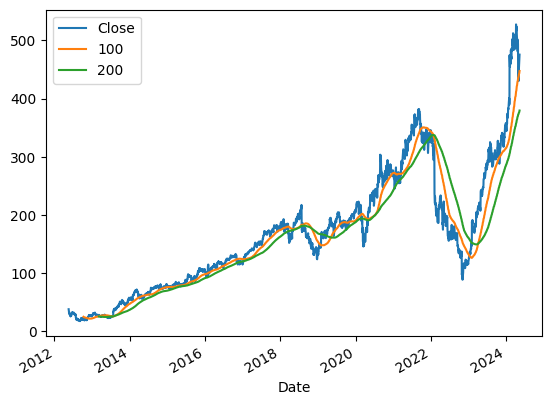

In [10]:
df_ma100 = dfw.rolling(100).mean()
df_ma200 = dfw.rolling(200).mean()

dfw.plot(legend=True)
df_ma100.plot(label='100', legend=True)
df_ma200.plot(label='200', legend=True)

In [11]:
n = len(dfw)
df_training = pd.DataFrame(dfw[0:int(n*0.70)])
df_validating = pd.DataFrame(dfw[int(n*0.70):int(n*0.90)])
df_testing = pd.DataFrame(dfw[int(n*0.9):])

dfw.shape, df_training.shape, df_validating.shape, df_testing.shape

((3013,), (2109, 1), (602, 1), (302, 1))

In [12]:
df_training.head()

,Close
Date,
2012-05-18 00:00:00-04:00,38.189480
2012-05-21 00:00:00-04:00,33.993931
2012-05-22 00:00:00-04:00,30.967144
2012-05-23 00:00:00-04:00,31.966084
2012-05-24 00:00:00-04:00,32.994991


In [13]:
df_validating.head()

,Close
Date,
2020-10-06 00:00:00-04:00,258.385864
2020-10-07 00:00:00-04:00,257.846405
2020-10-08 00:00:00-04:00,263.480438
2020-10-09 00:00:00-04:00,264.169739
2020-10-12 00:00:00-04:00,275.457733


In [14]:
df_testing.head()

,Close
Date,
2023-02-28 00:00:00-05:00,174.754593
2023-03-01 00:00:00-05:00,173.236191
2023-03-02 00:00:00-05:00,174.345016
2023-03-03 00:00:00-05:00,185.053650
2023-03-06 00:00:00-05:00,184.704025


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
data_training = scaler.fit_transform(df_training)
data_training

array([[0.07163323],
       [0.05695715],
       [0.04636942],
       ...,
       [0.86973237],
       [0.84635543],
       [0.86281363]])

In [17]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])


x_train, y_train
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((2009, 100, 1), (2009,))

In [19]:
n_input = x_train.shape[1]
n_features = 1

linear = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu',
                         input_shape=(n_input, n_features)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(units=120, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(units=1)
])

/home/goke/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
linear.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)